In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib as plt
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
# pip install ydata_profiling

In [3]:
# Load your dataset
data = pd.read_csv('C:\\Users\\nmishra4\\Desktop\\Polaris\\KT docs\\Bits Pilani MTech DS\\Dissertation\\PPD - Regression Master Data.csv')


In [4]:
data.head()

,Patient ID,PPD_flag,PPD_Diag_method,State_code,PPD_Diag_Period,Treatment_Method,Treatment_Flag,Age,OB_GYN_visit,PCP_visit,...,Region_South,PPD_event,Treatment_event,Age_less_than_25,PPD_Diag_3rd_trimester_to_delivery,PPD_Diag_upto_3_months_post_delivery,PPD_Diag_3_mths_post_delivery,PPD_Diag_Spec_Ob_gyn,PPD_Diag_Spec_mental,PPD_Diag_Spec_primary
0,109236051.0,N,NaN,MI,NaN,No Treatment,NaN,31.35,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,124015497.5,N,NaN,NY,NaN,No Treatment,NaN,41.20,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15070972.0,N,NaN,TX,NaN,No Treatment,NaN,35.50,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,135860810.5,N,NaN,HI,NaN,No Treatment,NaN,27.30,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,336032074.5,N,NaN,NJ,NaN,No Treatment,NaN,23.89,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
data.dtypes

Patient ID                              float64
PPD_flag                                 object
PPD_Diag_method                          object
State_code                               object
PPD_Diag_Period                          object
                                         ...   
PPD_Diag_upto_3_months_post_delivery      int64
PPD_Diag_3_mths_post_delivery             int64
PPD_Diag_Spec_Ob_gyn                      int64
PPD_Diag_Spec_mental                      int64
PPD_Diag_Spec_primary                     int64
Length: 101, dtype: object

In [8]:
print(data.head())  # Display the first few rows of the dataset 

    Patient ID PPD_flag PPD_Diag_method State_code PPD_Diag_Period  \
0  109236051.0        N             NaN         MI             NaN   
1  124015497.5        N             NaN         NY             NaN   
2   15070972.0        N             NaN         TX             NaN   
3  135860810.5        N             NaN         HI             NaN   
4  336032074.5        N             NaN         NJ             NaN   

  Treatment_Method Treatment_Flag    Age  OB_GYN_visit  PCP_visit  ...  \
0     No Treatment            NaN  31.35           1.0        1.0  ...   
1     No Treatment            NaN  41.20           1.0        0.0  ...   
2     No Treatment            NaN  35.50           1.0        1.0  ...   
3     No Treatment            NaN  27.30           1.0        1.0  ...   
4     No Treatment            NaN  23.89           1.0        1.0  ...   

   Region_South  PPD_event  Treatment_event  Age_less_than_25  \
0             0          0                0                 0   
1   

In [9]:
print(data.info())  # Display information about the columns and data types  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252921 entries, 0 to 252920
Columns: 101 entries, Patient ID to PPD_Diag_Spec_primary
dtypes: float64(5), int64(90), object(6)
memory usage: 189.1+ MB
None


In [10]:
# Get an overview of the dataset  
print(data.describe())  # Display summary statistics of the numerical columns 

         Patient ID            Age   OB_GYN_visit      PCP_visit  \
count  2.529210e+05  252921.000000  252907.000000  252907.000000   
mean   8.729723e+07      30.367707       0.941639       0.687909   
std    4.459105e+07       5.689956       0.234426       0.463348   
min    1.139805e+05      18.000000       0.000000       0.000000   
25%    5.309190e+07      26.260000       1.000000       0.000000   
50%    9.185661e+07      30.750000       1.000000       1.000000   
75%    1.228537e+08      34.470000       1.000000       1.000000   
max    3.435716e+08      45.000000       1.000000       1.000000   

       Mental_Health_visit  Blood_Loss_Anemia  Psychoactive_disorder  \
count        252907.000000      252921.000000               252921.0   
mean              0.200153           0.005551                    0.0   
std               0.400115           0.074299                    0.0   
min               0.000000           0.000000                    0.0   
25%               0.000000 

In [12]:
 
# Check for missing values  
print(data.isnull().sum())  # Display the total number of missing values in each column  


Patient ID                                   0
PPD_flag                                     0
PPD_Diag_method                         230398
State_code                                   0
PPD_Diag_Period                         230398
                                         ...  
PPD_Diag_upto_3_months_post_delivery         0
PPD_Diag_3_mths_post_delivery                0
PPD_Diag_Spec_Ob_gyn                         0
PPD_Diag_Spec_mental                         0
PPD_Diag_Spec_primary                        0
Length: 101, dtype: int64


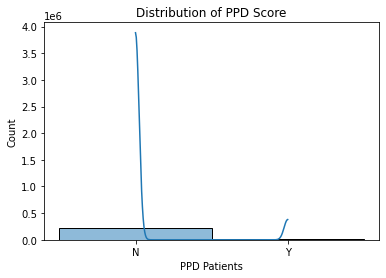

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

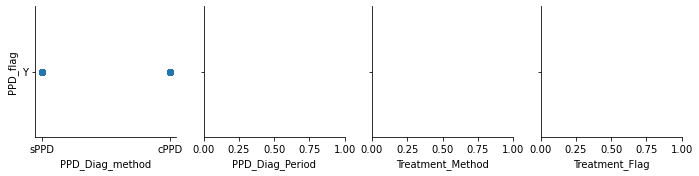

In [16]:
  
# Explore the distribution of the target variable  
sns.histplot(data['PPD_flag'], kde=True)  
plt.title('Distribution of PPD Score')  
plt.xlabel('PPD Patients')  
plt.ylabel('Count')  
plt.show()  
  
# Explore the relationship between the target variable and other variables  
sns.pairplot(data, x_vars=['PPD_Diag_method', 'PPD_Diag_Period', 'Treatment_Method','Treatment_Flag'], y_vars='PPD_flag', kind='reg')  
plt.show()  
  
# Correlation matrix  
corr_matrix = data.corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix')  
plt.show()  

In [20]:
split_index = 85000
data = pd.concat([
    pd.json_normalize(data[:split_index], sep="_"),
    pd.json_normalize(data[split_index:], sep="_"),
], ignore_index=True)

In [21]:

# Let's assume 'data' is your DataFrame and it's already loaded.
# Preprocess the data
X = data.drop('PPD_flag', axis=1)  # Features
y = data['PPD_flag']               # Target


KeyError: "['PPD_flag'] not found in axis"

In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()

# Train the models
logistic_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test_scaled)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the models
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Decision Tree Accuracy: {decision_tree_accuracy}')